## Import Libraries


In [36]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [4]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

<h1 style="font-size:2em;color:#2467C0">Exploring Data</h1>



In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>


In [7]:
#is any row NULL ?
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [8]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

## Fixing Null Values by Deleting Them



In [9]:
# Fix it

# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

In [10]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [11]:
#How many rows with NULL values?

rows - df.shape[0]

3624

In [12]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

<h1 style="font-size:2em;color:#2467C0">Predicting: 'overall_rating' of a player</h1>


In [13]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183565,183566,158293,19696,2010-08-30 00:00:00,70.0,70.0,right,high,high,70.0,...,78.0,68.0,69.0,67.0,60.0,13.0,16.0,6.0,10.0,14.0
63459,63460,189125,127460,2013-04-12 00:00:00,78.0,85.0,right,medium,medium,75.0,...,74.0,67.0,59.0,73.0,71.0,10.0,14.0,7.0,15.0,14.0
29072,29073,169403,37381,2008-08-30 00:00:00,75.0,80.0,left,medium,medium,74.0,...,73.0,69.0,74.0,74.0,78.0,8.0,22.0,71.0,22.0,22.0
104152,104153,23015,30709,2014-10-10 00:00:00,73.0,73.0,right,high,medium,29.0,...,67.0,80.0,25.0,23.0,25.0,11.0,13.0,5.0,6.0,4.0
27835,27836,204760,289137,2015-01-09 00:00:00,62.0,72.0,left,high,medium,64.0,...,49.0,39.0,63.0,64.0,62.0,12.0,5.0,13.0,12.0,7.0


In [14]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
183565,68.0,70.0
63459,67.0,78.0
29072,69.0,75.0
104152,80.0,73.0
27835,39.0,62.0
48634,50.0,63.0
67691,73.0,73.0
162305,51.0,71.0
20,58.0,70.0
33150,61.0,73.0


## Feature Correlation Analysis 


In [15]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118874

## Create a list of potential Features that you want to measure correlation with

In [16]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

The for loop below prints out the correlation coefficient of "overall_rating" of a player with each feature we added to the list as potential.

In [17]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


<h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1>


In [18]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [19]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [20]:
len(cols), len(correlations)

(34, 34)

In [21]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [22]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

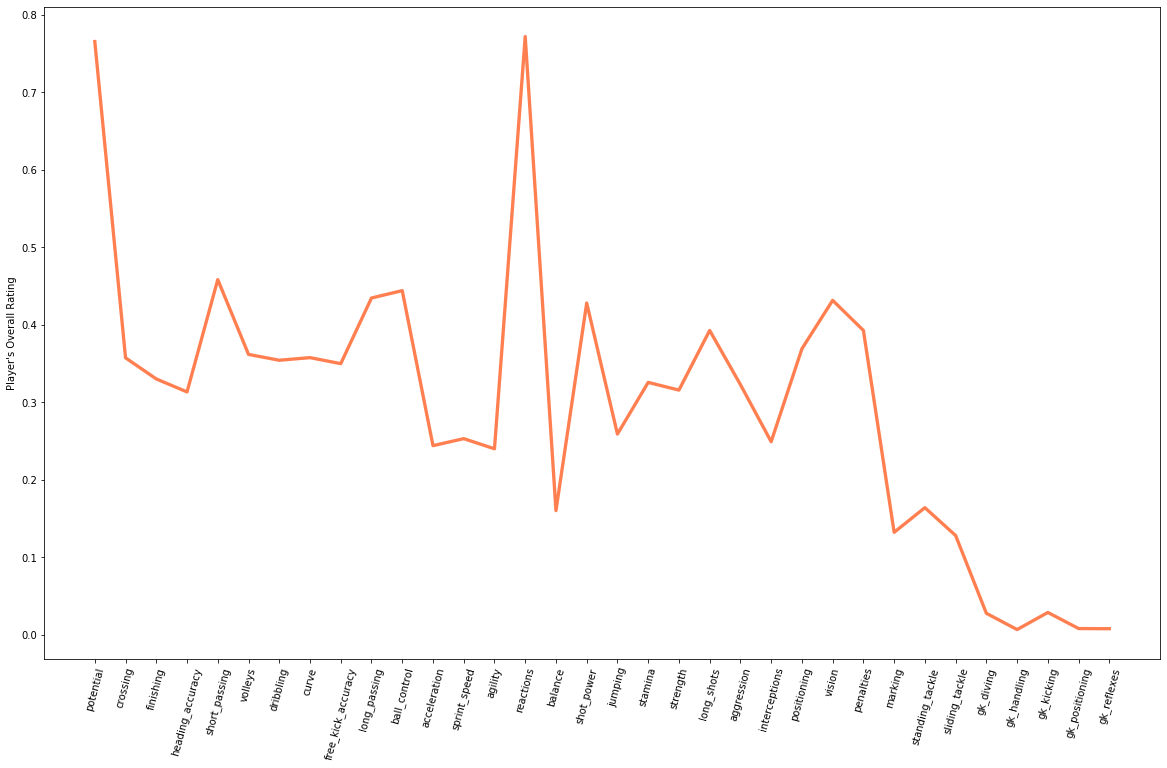

In [23]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

## Select Features on Which to Group Players

In [24]:
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [25]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)

In [26]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
183565,6.0,70.0,69.0,65.0,67.0
63459,7.0,85.0,59.0,72.0,73.0
29072,71.0,80.0,74.0,74.0,74.0
104152,5.0,73.0,25.0,25.0,23.0
27835,13.0,72.0,63.0,59.0,64.0


## Perform KMeans Clustering



In [37]:
# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [38]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50707
1    55853
2    23788
3    50006
dtype: int64

In [39]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.045000,0.699286,1.027136,0.981655,1.029631,0
1,-0.477131,0.107166,-0.948188,-0.975672,-0.914691,1
2,1.920842,0.039222,-1.110357,-0.651675,-1.199601,2
3,-0.335919,-0.848998,0.545299,0.403732,0.547831,3


<h1 style="font-size:2em;color:#3624C0">Visualization of Clusters</h1>


In [40]:
# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline

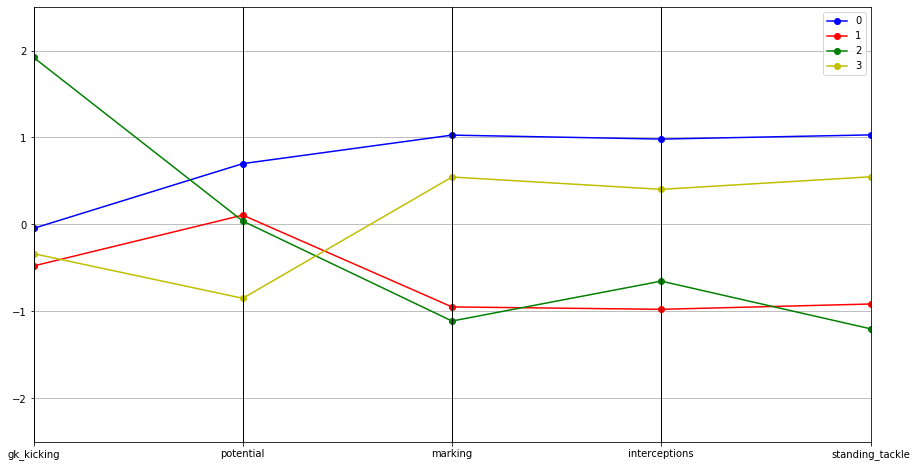

In [41]:
parallel_plot(P)